In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [6]:
IMAGE_SIZE = [224, 224]
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [8]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 11s 0us/step


In [9]:
for layer in vgg.layers:
  layer.trainable = False

In [10]:
folders = glob('Datasets/train/*')

In [11]:
x = Flatten()(vgg.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

In [13]:
model = Model(inputs=vgg.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3352 images belonging to 7 classes.


In [19]:
test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 813 images belonging to 7 classes.


In [21]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
105/105 [==============================] - 451s 4s/step - loss: 0.1683 - accuracy: 0.9555 - val_loss: 0.3065 - val_accuracy: 0.9041
Epoch 2/20
105/105 [==============================] - 450s 4s/step - loss: 0.1255 - accuracy: 0.9702 - val_loss: 0.3437 - val_accuracy: 0.8893
Epoch 3/20
105/105 [==============================] - 463s 4s/step - loss: 0.1095 - accuracy: 0.9737 - val_loss: 0.2966 - val_accuracy: 0.9127
Epoch 4/20
105/105 [==============================] - 465s 4s/step - loss: 0.0950 - accuracy: 0.9779 - val_loss: 0.3071 - val_accuracy: 0.9028
Epoch 5/20
105/105 [==============================] - 455s 4s/step - loss: 0.0691 - accuracy: 0.9848 - val_loss: 0.2471 - val_accuracy: 0.9262
Epoch 6/20
105/105 [==============================] - 451s 4s/step - loss: 0.0577 - accuracy: 0.9869 - val_loss: 0.2779 - val_accuracy: 0.9028
Epoch 7/20
105/105 [==============================] - 453s 4s/step - loss: 0.0627 - accuracy: 0.9869 - val_loss: 0.3616 - val_accuracy: 0.8856

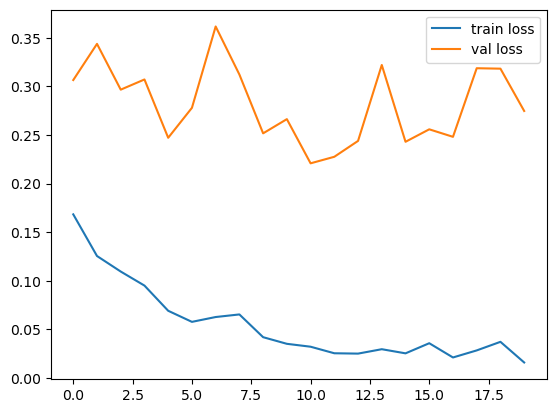

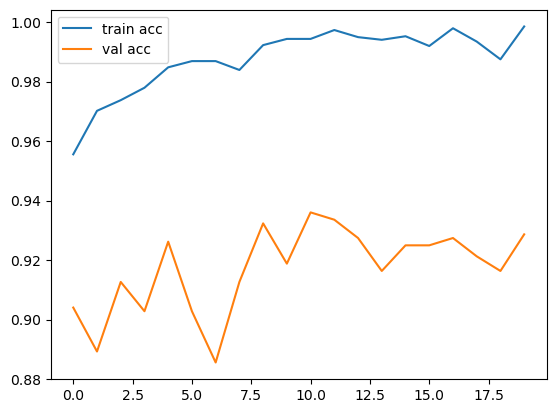

<Figure size 640x480 with 0 Axes>

In [22]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.keras')

In [25]:
y_pred = model.predict(test_set)

26/26 [==============================] - 160s 6s/step


In [26]:
y_pred

array([[1.4746154e-06, 6.1188644e-04, 5.1451148e-05, ..., 7.1260047e-08,
        9.9933463e-01, 1.2698534e-07],
       [4.1652005e-02, 3.6135163e-02, 6.5332213e-05, ..., 1.6670331e-04,
        1.6841824e-04, 1.0443683e-03],
       [4.6991835e-07, 1.0033997e-09, 2.4790660e-08, ..., 2.9901194e-08,
        6.8966133e-10, 1.0118213e-09],
       ...,
       [2.1956244e-05, 1.1372113e-03, 2.5505298e-07, ..., 9.9877673e-01,
        2.1585069e-05, 1.8077773e-05],
       [3.5936278e-01, 6.3701940e-05, 2.8015060e-10, ..., 8.4705744e-04,
        3.7667123e-06, 1.4708171e-07],
       [9.9623954e-01, 6.7414912e-05, 1.1495698e-07, ..., 3.3868616e-07,
        9.0255006e-04, 9.2777227e-05]], dtype=float32)

In [27]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([5, 3, 3, 0, 6, 6, 6, 3, 6, 2, 0, 0, 4, 3, 2, 0, 5, 4, 6, 5, 1, 0,
       0, 6, 4, 6, 5, 6, 1, 0, 6, 6, 6, 5, 0, 0, 3, 2, 6, 2, 5, 5, 0, 3,
       6, 2, 5, 0, 2, 6, 6, 4, 6, 6, 0, 0, 1, 6, 0, 6, 4, 6, 3, 6, 6, 2,
       2, 6, 6, 1, 5, 5, 0, 5, 5, 1, 6, 0, 6, 1, 3, 2, 4, 1, 4, 0, 6, 5,
       0, 6, 0, 6, 6, 3, 6, 0, 6, 6, 2, 3, 0, 3, 0, 5, 3, 3, 3, 0, 6, 6,
       6, 6, 6, 0, 4, 0, 5, 6, 3, 6, 5, 6, 4, 6, 5, 4, 6, 6, 3, 3, 2, 2,
       0, 2, 6, 0, 6, 0, 0, 0, 3, 1, 5, 0, 6, 0, 0, 6, 4, 0, 0, 3, 6, 6,
       4, 6, 4, 0, 0, 2, 3, 1, 5, 0, 0, 6, 0, 4, 6, 0, 2, 3, 5, 3, 6, 1,
       0, 5, 5, 6, 1, 6, 3, 3, 3, 4, 3, 5, 5, 5, 4, 2, 0, 1, 6, 2, 0, 0,
       6, 0, 4, 6, 0, 1, 1, 6, 5, 4, 0, 4, 6, 6, 4, 6, 5, 4, 2, 6, 0, 4,
       6, 0, 1, 3, 6, 1, 4, 3, 3, 5, 1, 2, 6, 0, 3, 6, 5, 6, 1, 0, 4, 2,
       1, 6, 6, 4, 0, 0, 6, 1, 0, 5, 4, 2, 0, 6, 0, 2, 4, 6, 0, 6, 4, 0,
       2, 5, 6, 0, 3, 6, 6, 6, 0, 3, 6, 4, 1, 2, 1, 5, 5, 6, 5, 4, 0, 0,
       5, 5, 6, 6, 4, 3, 2, 6, 4, 4, 6, 0, 6, 6, 6,

In [29]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_vgg16.keras')

In [32]:
img_data

NameError: name 'img_data' is not defined

In [33]:
img=image.load_img('Datasets/Test/Swift/677.jpg',target_size=(224,224))

In [34]:
x=image.img_to_array(img)
x

array([[[136., 135., 143.],
        [138., 137., 145.],
        [139., 138., 146.],
        ...,
        [142., 139., 146.],
        [142., 139., 146.],
        [140., 137., 144.]],

       [[136., 135., 143.],
        [138., 137., 145.],
        [140., 139., 147.],
        ...,
        [143., 140., 147.],
        [142., 139., 146.],
        [141., 138., 145.]],

       [[136., 135., 143.],
        [138., 137., 145.],
        [140., 139., 147.],
        ...,
        [143., 140., 147.],
        [142., 139., 146.],
        [141., 138., 145.]],

       ...,

       [[179., 152., 109.],
        [138., 111.,  68.],
        [154., 127.,  84.],
        ...,
        [125., 102.,  58.],
        [139., 116.,  72.],
        [170., 147., 103.]],

       [[179., 152., 109.],
        [138., 111.,  68.],
        [154., 127.,  84.],
        ...,
        [125., 102.,  58.],
        [139., 116.,  72.],
        [170., 147., 103.]],

       [[151., 124.,  81.],
        [173., 146., 103.],
        [163., 1

In [35]:
x.shape

(224, 224, 3)

In [36]:
x=x/255

In [37]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

1/1 [==============================] - 0s 276ms/step


array([[1.5315570e-06, 1.3470912e-03, 2.1199429e-02, 1.3165276e-10,
        1.4054592e-03, 9.7604650e-01, 1.5058585e-09]], dtype=float32)

In [39]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 468ms/step


In [40]:
a

array([5], dtype=int64)